In [1]:
from helpers import *
from gaussfit import *

from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

## Configuration

In [2]:
# list of PMTs at 0 voltage form HV files + disconnected pmts: 290
offPMTs = [1, 111, 143, 166, 192, 230, 238, 254, 222, 302, 309, 340, 353, 290 ]
offChs = PMTid_to_channel(offPMTs)

# drifting PMTs --> wait for full list
driftPMTs = [ 59, 63, 81, 93, 95, 142, 148, 169, 170, 179, 282, 310]
driftChs = PMTid_to_channel(driftPMTs)

# PMTs not changed
nochangePMTs = [310, 282, 262, 248, 90]
nochangeChs = PMTid_to_channel(nochangePMTs)

# PMTS not changed + lowered due to high LVDS counts
lvdsPMTs = [ 262, 248 ]
lvdsChs = PMTid_to_channel(lvdsPMTs)

# PMTs manual fix
manualPMTs = [ 263, 93, 95, 337, 194, 148, 236, 113, 104]
manualChs = PMTid_to_channel(manualPMTs)

In [5]:
srcpath = "/icarus/data/users/mvicenzi/pmt-calibration/calibrationdb/"
histpath = "/icarus/data/users/mvicenzi/pmt-calibration/quick/"
figpath = "/icarus/data/users/mvicenzi/pmt-calibration/figs/"

#file = srcpath + "backgroundphotons_run9226_1670516550.csv" #nominal 
#file = srcpath + "backgroundphotons_run9227_1670518289.csv" #+50V
#file = srcpath + "backgroundphotons_run9228_1670519753.csv" #+100V
#file = srcpath + "backgroundphotons_run9229_1670521305.csv" #-30V
#file = srcpath + "backgroundphotons_run9230_1670522684.csv" #-50V

#file = srcpath + "backgroundphotons_run9246_1670941359.csv"
#file = srcpath + "backgroundphotons_run9249_1670967127.csv"
#file = srcpath + "backgroundphotons_run9260_1671044146.csv"
#file = srcpath + "backgroundphotons_run9271_1671126368.csv"
#file = srcpath + "backgroundphotons_run9383_1673718128.csv"
#file = srcpath + "backgroundphotons_run9499_1676437736.csv"
#file = srcpath + "backgroundphotons_run9627_1678470964.csv"
#file = srcpath + "backgroundphotons_run9598_1677975945.csv"
#file = srcpath + "backgroundphotons_run9560_1676853415.csv"

file = getMostRecentCalibration(srcpath)

## PMT gain distribution

Loading data from: /icarus/data/users/mvicenzi/pmt-calibration/calibrationdb/backgroundphotons_run9627_1678470964.csv


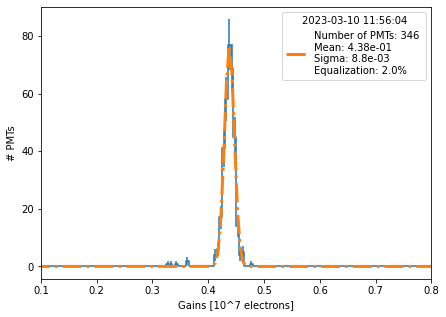

In [6]:
print( "Loading data from: "+ file )
run=getRun(file)
timestamp=getTimestamp(file)
data = getDataFrame(file, offPMTs, False)

fitOutput  = fitGainsDistribution( data, BINSIZE=0.005,RMIN=0.0,RMAX=1.0, p0=(0.4, 0.04) )

plt.xlim((0.1, 0.8))
plt = makeplot(timestamp, figpath+"gain_hist_"+str(run)+".pdf", *fitOutput )
#data[["pmt", "q", "eq"]].to_csv(histpath+"histogram_run"+str(run)+"_"+str(timestamp)+".csv")

## Scatter plots

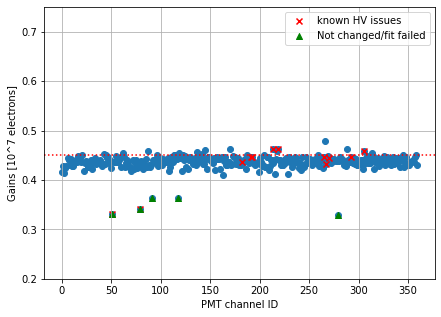

In [8]:
plt.scatter(data["pmt"],data["q"],marker="o")

## latest equalization target
plt.axhline(y=0.45, color="red", linestyle='dotted')

## KNOWN HV ISSUES
drift_data = data[data['pmt'].isin(driftChs)]
plt.scatter(drift_data["pmt"],drift_data["q"],marker="x",color="red", label="known HV issues")

## NOT EQUALIZED
nochange_data = data[data['pmt'].isin(nochangeChs)]
plt.scatter(nochange_data['pmt'],nochange_data['q'],marker="^",color="green", label="Not changed/fit failed")

## MANUALLY EQUALIZED
manual_data = data[data['pmt'].isin(manualChs)]
#plt.scatter(manual_data['pmt'],manual_data['q'],marker="^",color="violet", label="Manual adjustment")

plt.ylim((0.2,0.75))
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.legend()
plt.grid()

In [16]:
## PRINTING OUTLIERS
low_bound = 0.4
high_bound = 0.46

ch_high = data.loc[ data["q"] > high_bound, ["pmt", "q"]]
ch_low = data.loc[ data["q"] < low_bound, ["pmt", "q"]]

print("PMT channels above "+ str(high_bound))
pmt_high = channel_to_PMTid(ch_high["pmt"].to_numpy())
print("Ch ID: ", ch_high.pmt.to_numpy() )
print("PMT ID: ", pmt_high )
print("q: ", ch_high.q.to_numpy() )

print("PMT channels below "+ str(low_bound))
pmt_low = channel_to_PMTid(ch_low["pmt"].to_numpy())
print("Ch ID: ", ch_low.pmt.to_numpy() )
print("PMT ID: ", pmt_low )
print("q: ", ch_low.q.to_numpy() )

PMT channels above 0.46
Ch ID:  [145 170 214 219 266 288]
PMT ID:  [219, 181, 148, 142, 94, 76]
q:  [0.461099 0.46171  0.463584 0.462114 0.479562 0.463298]
PMT channels below 0.4
Ch ID:  [ 51  79  91 117 279]
PMT ID:  [310, 282, 262, 248, 90]
q:  [0.3309   0.340522 0.364297 0.364359 0.32961 ]


## Comparisons and random stuff

In [ ]:
file0 = srcpath +"backgroundphotons_run9226_1670516550.csv"
file1 = srcpath +"backgroundphotons_run9246_1670941359.csv"
file2 = srcpath +"backgroundphotons_run9249_1670967127.csv"
file3 = srcpath +"backgroundphotons_run9260_1671044146.csv"
file4 = srcpath +"backgroundphotons_run9271_1671126368.csv"

data_0 = getDataFrame(file0, offPMTs, False)
data_nom = getDataFrame(file3, offPMTs, False)
data_pre = getDataFrame(file1, offPMTs, False)
data_after = getDataFrame(file2, offPMTs, False)
data_fin = getDataFrame(file4, offPMTs, False)

manual_data_0 = data_0[data_0['pmt'].isin(manual_channels)]
plt.scatter(manual_data_0['pmt'],manual_data_0['q'],marker="s", color="green", label="Start (9226)")
manual_data_nom = data_nom[data_nom['pmt'].isin(manual_channels)]
plt.scatter(manual_data_nom['pmt'],manual_data_nom['q'],marker="x", color="red", label="After second fix (9260)")
manual_data_pre = data_pre[data_pre['pmt'].isin(manual_channels)]
plt.scatter(manual_data_pre['pmt'],manual_data_pre['q'],marker="^", label="Before manual fix (9246)")
manual_data_after= data_after[data_after['pmt'].isin(manual_channels)]
plt.scatter(manual_data_after['pmt'],manual_data_after['q'],marker="o",color="orange", label="After manual fix (9249)")
manual_data_fin= data_fin[data_fin['pmt'].isin(manual_channels)]
plt.scatter(manual_data_fin['pmt'],manual_data_fin['q'],marker=">",color="purple", label="Final (9271)")

plt.axhline(y=0.45, color="red", linestyle='dotted')
plt.legend()
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()
plt.xlim((0.0, 359))


print(manual_channels)

In [ ]:
file0 = srcpath +"backgroundphotons_run9271_1671126368.csv"
file1 = srcpath +"backgroundphotons_run9383_1673718128.csv"

data_pre = getDataFrame(file0, offPMTs, False)
data_after = getDataFrame(file1, offPMTs, False)

plt.scatter(data_pre['pmt'],data_pre['q'],marker="o", alpha=0.5, label="Run 9271")
plt.scatter(data_after['pmt'],data_after['q'],marker="o",color="orange", label="Run 9383")

plt.axhline(y=0.45, color="red", linestyle='dotted')
plt.legend()
plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()
plt.xlim((0.0, 359))